In [50]:
!pip install gym
!pip install sb3-contrib
!pip install finta


[autoreload of multi_asset_env failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 309, in update_function
    setattr(old, name, getattr(new, name))
ValueErro

In [51]:
%load_ext autoreload
%autoreload 2

# Gym stuff
import gym

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3 import A2C
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.monitor import Monitor


# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from multi_asset_env import MultiAssetTradingEnv
from finta import TA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
df = pd.read_csv('data/BTCUSD/BTCUSD_daily.csv')

df.head()

,datetime,symbol,open,high,low,close,volume
0,2014-12-01 08:00:00,COINBASE:BTCUSD,300.0,370.0,300.00,370.0,0.0
1,2014-12-02 08:00:00,COINBASE:BTCUSD,377.0,378.0,377.00,378.0,15.0
2,2014-12-03 08:00:00,COINBASE:BTCUSD,377.9,378.0,377.01,378.0,0.0
3,2014-12-04 08:00:00,COINBASE:BTCUSD,377.1,377.1,377.10,377.1,0.0
4,2014-12-06 08:00:00,COINBASE:BTCUSD,378.0,378.0,378.00,378.0,0.0


In [53]:
df = df.drop("symbol", axis=1)

df.head()

,datetime,open,high,low,close,volume
0,2014-12-01 08:00:00,300.0,370.0,300.00,370.0,0.0
1,2014-12-02 08:00:00,377.0,378.0,377.00,378.0,15.0
2,2014-12-03 08:00:00,377.9,378.0,377.01,378.0,0.0
3,2014-12-04 08:00:00,377.1,377.1,377.10,377.1,0.0
4,2014-12-06 08:00:00,378.0,378.0,378.00,378.0,0.0


In [54]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
dtype: object

In [55]:
df.sort_values('datetime', ascending=True, inplace=True)
df.head()

,datetime,open,high,low,close,volume
0,2014-12-01 08:00:00,300.0,370.0,300.00,370.0,0.0
1,2014-12-02 08:00:00,377.0,378.0,377.00,378.0,15.0
2,2014-12-03 08:00:00,377.9,378.0,377.01,378.0,0.0
3,2014-12-04 08:00:00,377.1,377.1,377.10,377.1,0.0
4,2014-12-06 08:00:00,378.0,378.0,378.00,378.0,0.0


In [56]:
df.set_index('datetime', inplace=True)
df.head()

,open,high,low,close,volume
datetime,,,,,
2014-12-01 08:00:00,300.0,370.0,300.00,370.0,0.0
2014-12-02 08:00:00,377.0,378.0,377.00,378.0,15.0
2014-12-03 08:00:00,377.9,378.0,377.01,378.0,0.0
2014-12-04 08:00:00,377.1,377.1,377.10,377.1,0.0
2014-12-06 08:00:00,378.0,378.0,378.00,378.0,0.0


In [57]:
env = MultiAssetTradingEnv(
    df=df,
    window_size=12,
    frame_bound=(1885, 2920),
)

In [58]:
env.signal_features

array([[ 1.0014957e+04,  9.7852796e-01,  1.0778170e+00, ...,
         1.9554099e-01,  1.0385331e-03, -2.5575668e-01],
       [ 9.9755654e+03,  9.8566198e-01,  1.0672868e+00, ...,
         2.0885675e-01,  8.9083826e-03, -4.2873794e-01],
       [ 9.9602695e+03,  9.8115420e-01,  1.0555456e+00, ...,
         2.0264207e-01, -2.8291009e-03, -5.3328425e-01],
       ...,
       [ 1.6733900e+04,  9.8168570e-01,  9.9539655e-01, ...,
        -3.2035869e-01, -1.6502741e-03,  3.2077190e-01],
       [ 1.6741451e+04,  9.7916728e-01,  9.9250007e-01, ...,
        -3.4937683e-01, -4.2017819e-03, -4.1902733e-01],
       [ 1.6717611e+04,  9.8573083e-01,  9.9068373e-01, ...,
        -3.2929274e-01,  4.9139913e-03, -3.0787787e-01]], dtype=float32)

In [59]:
env.action_space

Discrete(3)

info {'total_reward': -8.891110118475748, 'total_profit': 0.09675558185625127, 'position': <Positions.Long: 1>, 'tick': 536, 'action': 1}


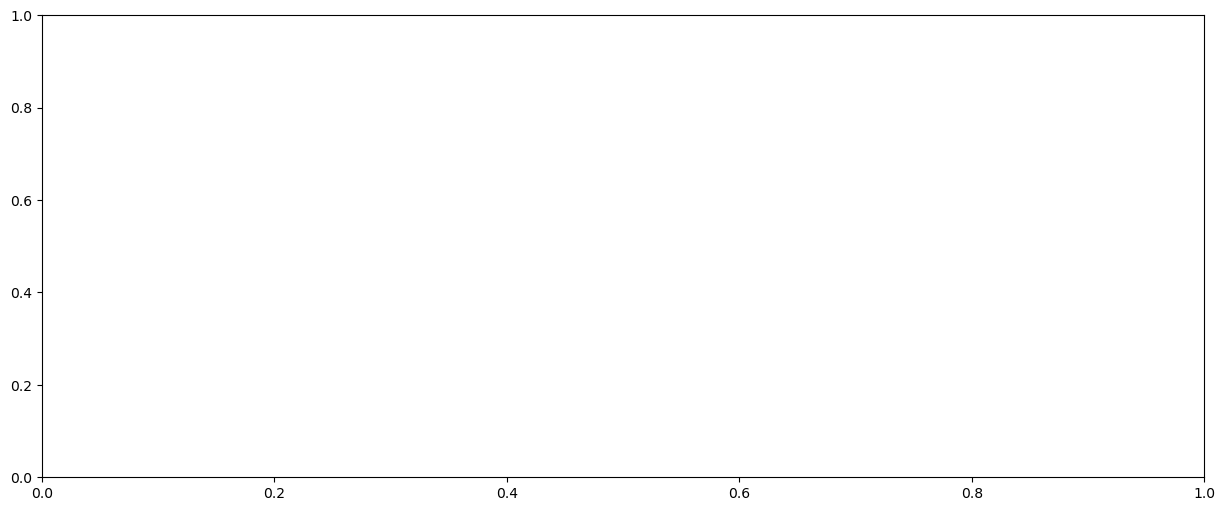

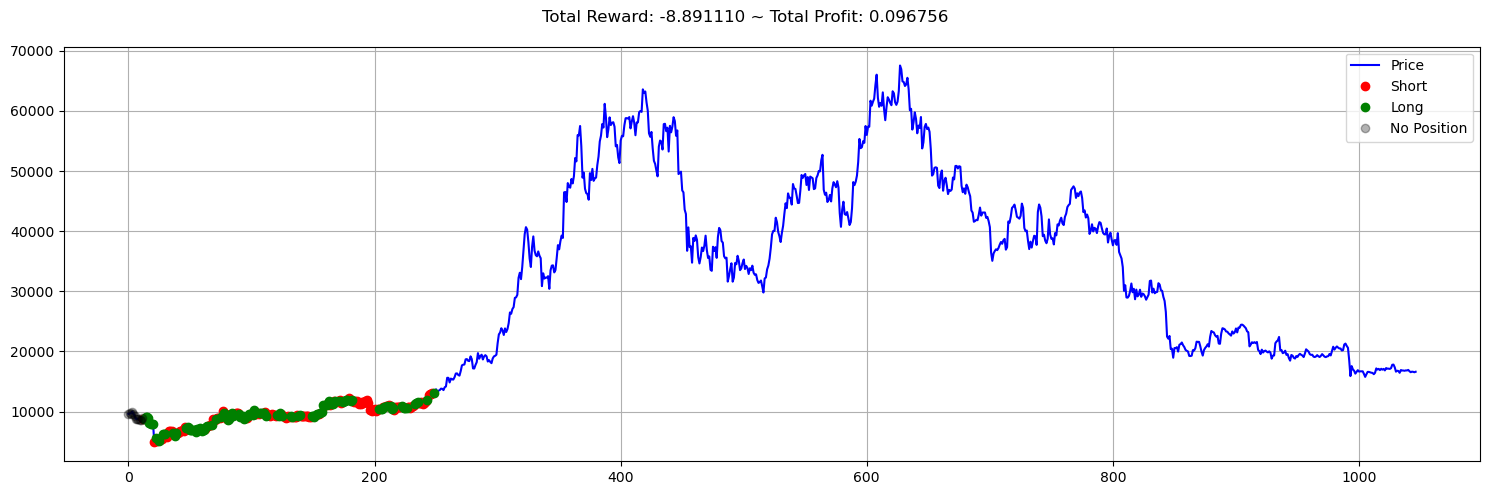

In [60]:
state, info = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done: 
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [61]:


from stable_baselines3.common.env_util import make_vec_env

train_env = make_vec_env(lambda: MultiAssetTradingEnv(
    df=df,
    window_size=12,
    frame_bound=(1885, 2920),  # Updated frame_bound to avoid out-of-bounds errors
), n_envs=1)

In [62]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", train_env, verbose=1, device="cuda")
model.learn(total_timesteps=1_000_000)  # 你可以根据情况增减

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 420      |
|    ep_rew_mean     | -6.31    |
| time/              |          |
|    fps             | 5910     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 371         |
|    ep_rew_mean          | -6.74       |
| time/                   |             |
|    fps                  | 3893        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012108885 |
|    clip_fraction        | 0.0694      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.0803     |
|    learning

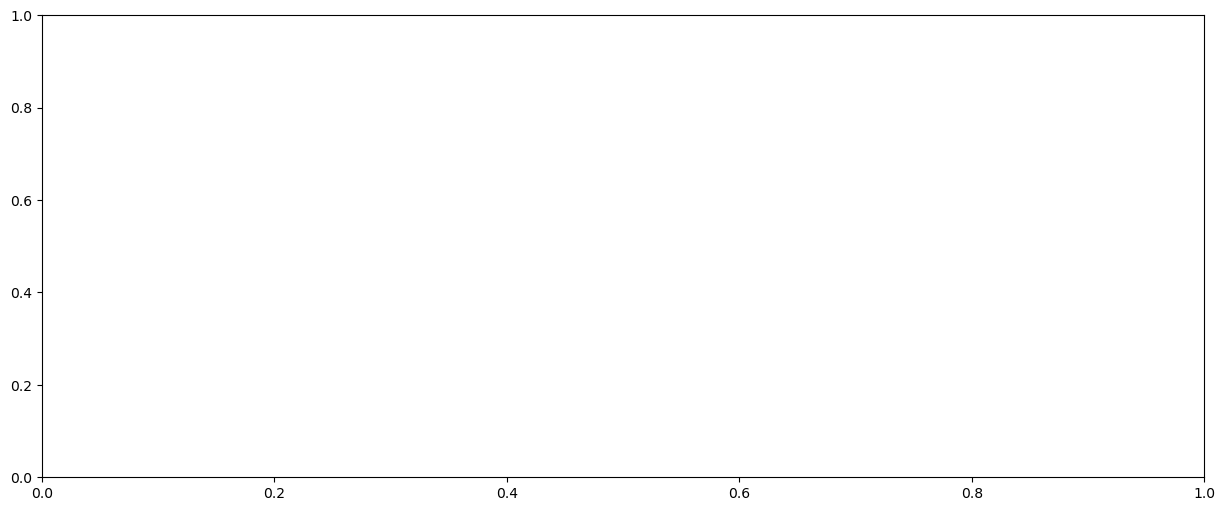

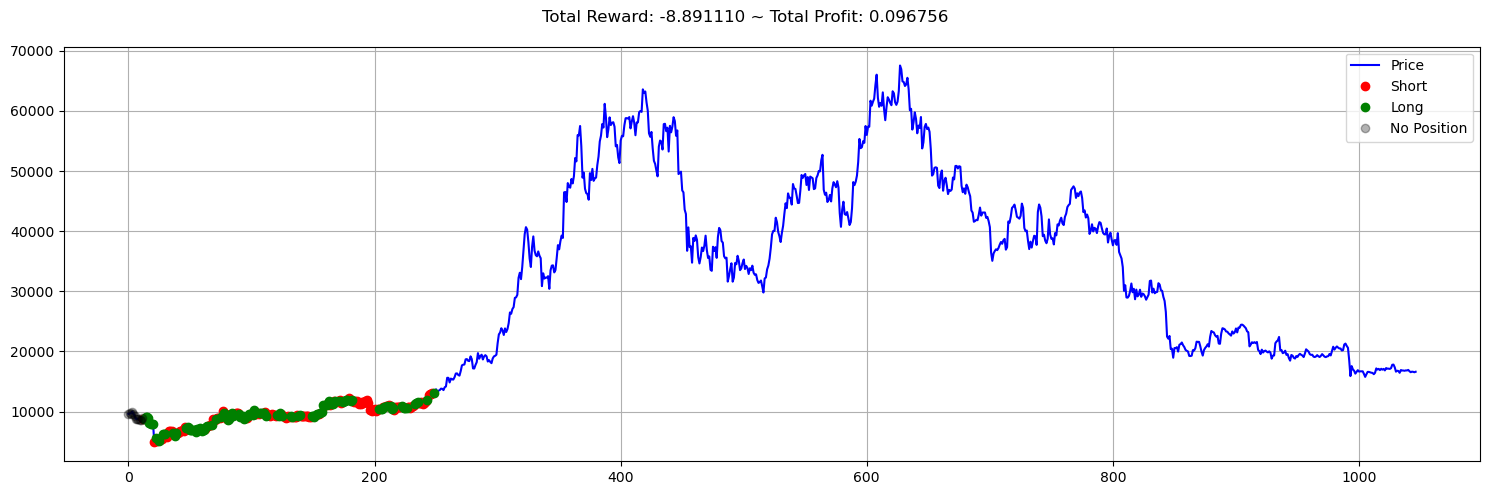

In [63]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()